# Data Analysis of India's Air Quality (2015-2020)

## 1) Importing libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import opendatasets as od

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
dataset_url='https://www.kaggle.com/rohanrao/air-quality-data-in-india?select=station_hour.csv'

In [7]:
od.download(dataset_url)

Skipping, found downloaded files in ".\air-quality-data-in-india" (use force=True to force download)


In [8]:
data_file='air-quality-data-in-india/station_hour.csv'

In [9]:
df=pd.read_csv(data_file)  # Reading csv file

C:\Python310\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
df.shape  # Give number of rows and columns respectively

(2589083, 16)

In [11]:
df.head() # shows first 5 rows of dataframe

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [12]:
original_df=df.copy()  #Save the original dataframe

In [13]:
stations='air-quality-data-in-india/stations.csv'

In [14]:
df_stations=pd.read_csv(stations) # Reading second csv file of StationId as a Primary Key & other details

In [15]:
df_stations.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


In [16]:
all_df=pd.merge(df,df_stations,on='StationId') # To merge two csv files using 'StationId' as a Primary Key

## 2) Maximum and minium values of each  column

In [17]:
pd.concat([all_df.min(),all_df.max()],keys=['min','max'],axis=1)

C:\Users\vinay\AppData\Local\Temp/ipykernel_9916/1446414948.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.concat([all_df.min(),all_df.max()],keys=['min','max'],axis=1)


,min,max
StationId,AP001,WB013
Datetime,2015-01-01 01:00:00,2020-07-01 00:00:00
PM2.5,0.01,1000.0
PM10,0.01,1000.0
NO,0.01,500.0
NO2,0.01,499.99
NOx,0.0,500.0
NH3,0.01,499.97
CO,0.0,498.57
SO2,0.01,199.96


## 3) Let's check the missing data

             Missing values  % of missing values
StationId                 0             0.000000
Datetime                  0             0.000000
City                      0             0.000000
StationName               0             0.000000
State                     0             0.000000
Status                 7706             0.297634
NOx                  490808            18.956828
CO                   499302            19.284897
NO2                  528973            20.430902
NO                   553711            21.386375
AQI                  570190            22.022855
AQI_Bucket           570190            22.022855
PM2.5                647689            25.016154
O3                   725973            28.039773
SO2                  742737            28.687261
Benzene              861579            33.277380
Toluene             1042366            40.260046
PM10                1119252            43.229669
NH3                 1236618            47.762779
Xylene              

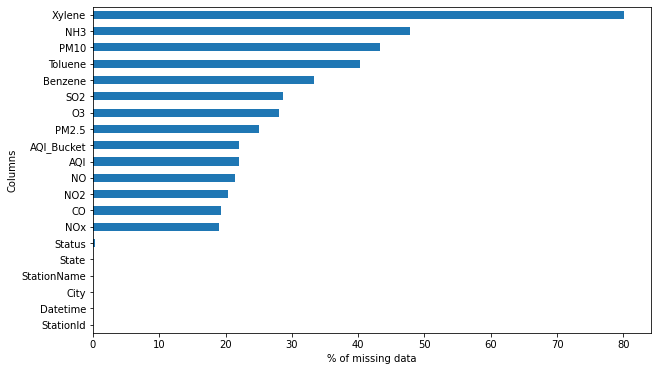

In [18]:
# sns.set_theme(context='notebook') # Notebook theme for plotting graph
def missing_data():
    missing_values=all_df.isnull().sum().sort_values()   # Counts Null values
    missing_values_percent=(all_df.isnull().sum()/len(all_df)*100).sort_values() # Calulates Null value percentage 
    mis_val_table=pd.concat([missing_values, missing_values_percent],keys=['Missing values','% of missing values'], axis=1)
    print(mis_val_table) # Prints table with 2 columns
    plt.figure(figsize=(10,6)) # Set the graph size(length,width)
    missing_values_percent.plot(kind='barh',x='% of empty values',y='columns')  # Plot the horizontal bar graph
    plt.xlabel('% of missing data')
    plt.ylabel('Columns')
    
missing_data()

In [19]:
all_df.head(30) # Shows first 30 rows

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.10,6.10,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.10,6.25,0.15,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.20,5.98,0.18,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.20,6.72,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.20,5.75,0.08,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
5,AP001,2017-11-24 22:00:00,69.25,108.25,0.70,18.47,10.38,13.80,0.1,9.25,91.10,0.20,5.02,0.00,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
6,AP001,2017-11-24 23:00:00,67.50,111.50,1.05,12.15,7.30,17.65,0.1,9.40,112.70,0.20,5.60,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
7,AP001,2017-11-25 00:00:00,68.00,111.00,1.25,14.12,8.50,20.28,0.1,8.90,116.12,0.20,5.55,0.05,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
8,AP001,2017-11-25 01:00:00,73.00,102.00,0.30,14.30,7.90,11.50,0.3,11.80,121.50,0.20,6.60,0.00,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
9,AP001,2017-11-25 02:00:00,81.00,123.00,0.80,24.85,13.88,10.28,0.1,11.62,83.80,0.23,6.77,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


### There are some rows where all pollutants are empty eg. index  15, 20.
### Also, AQI is calulated without pollutants' data (eg index 20)

### For calculation of  AQI, main 7 pollutants's data is collected by sensors at every hour i.e.( PM2.5, PM10, NOx, NH3, CO,SO2, O3) 

## 4) Let's calculate null data in major 7 pollutants

In [20]:
null_data=all_df[all_df['PM2.5'].isnull() & all_df['PM10'].isnull() & all_df['NOx'].isnull() & all_df['NH3'].isnull() 
                  & all_df['CO'].isnull() & all_df['SO2'].isnull()  & all_df['O3'].isnull() ]

In [21]:
null_data.shape # Missing data for all major pollutants 

(287296, 20)

### So, there are 287296 rows with no major pollutants's data available (sensor data)

In [22]:
len(null_data)/len(all_df)*100 # Percentage of missing all pollutants' data

11.096438391507727

In [23]:
null_data.head() # First 5 rows of missing data

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
15,AP001,2017-11-25 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
20,AP001,2017-11-25 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
72,AP001,2017-11-27 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227.0,Poor,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
73,AP001,2017-11-27 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227.0,Poor,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
74,AP001,2017-11-27 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227.0,Poor,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


In [24]:
delete_data=all_df['PM2.5'].isnull() & all_df['PM10'].isnull() & all_df['NOx'].isnull() & all_df['NH3'].isnull() & all_df['CO'].isnull() & all_df['SO2'].isnull() & all_df['O3'].isnull()
# Checking in dataframe for major pollutants with null data. If all specified columns are empty then it will return True else return False

In [25]:
delete_data.head(30) # To verify null data

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

### Index 15 and 20 are True because all major pollutants are empty.

## 5) Deleting missing pollutants' data rows from dataframe

In [26]:
all_df=all_df.drop(index=all_df[delete_data].index) # Drop the rows according to index 

In [27]:
all_df.reset_index(inplace=True) # resetting index and saving results permanently by using inplace=True 

In [28]:
all_df.head(25)

,index,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,...,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
0,0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,...,126.40,0.10,6.10,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,...,117.12,0.10,6.25,0.15,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,...,98.98,0.20,5.98,0.18,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,...,112.20,0.20,6.72,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,...,106.35,0.20,5.75,0.08,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
5,5,AP001,2017-11-24 22:00:00,69.25,108.25,0.70,18.47,10.38,13.80,0.1,...,91.10,0.20,5.02,0.00,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
6,6,AP001,2017-11-24 23:00:00,67.50,111.50,1.05,12.15,7.30,17.65,0.1,...,112.70,0.20,5.60,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
7,7,AP001,2017-11-25 00:00:00,68.00,111.00,1.25,14.12,8.50,20.28,0.1,...,116.12,0.20,5.55,0.05,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
8,8,AP001,2017-11-25 01:00:00,73.00,102.00,0.30,14.30,7.90,11.50,0.3,...,121.50,0.20,6.60,0.00,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
9,9,AP001,2017-11-25 02:00:00,81.00,123.00,0.80,24.85,13.88,10.28,0.1,...,83.80,0.23,6.77,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


### Index number 15 & 20 are deleted from dataframe.(index column )

In [29]:
all_df.drop(columns='index', inplace=True) # After resetting index, there is extra column 'index' (original index), 
                                           # so deleting that column

In [30]:
all_df.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


In [31]:
all_df.info() # Gives info of each column with data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301787 entries, 0 to 2301786
Data columns (total 20 columns):
 #   Column       Dtype  
---  ------       -----  
 0   StationId    object 
 1   Datetime     object 
 2   PM2.5        float64
 3   PM10         float64
 4   NO           float64
 5   NO2          float64
 6   NOx          float64
 7   NH3          float64
 8   CO           float64
 9   SO2          float64
 10  O3           float64
 11  Benzene      float64
 12  Toluene      float64
 13  Xylene       float64
 14  AQI          float64
 15  AQI_Bucket   object 
 16  StationName  object 
 17  City         object 
 18  State        object 
 19  Status       object 
dtypes: float64(13), object(7)
memory usage: 351.2+ MB


In [32]:
all_df.describe()  # Basic statistical data for Numerical columns

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,1.941394e+06,1.469831e+06,2.034945e+06,2.059904e+06,2.098275e+06,1.352465e+06,2.089781e+06,1.846346e+06,1.863110e+06,1.710448e+06,1.536035e+06,510624.000000,1.985856e+06
mean,8.086481e+01,1.584839e+02,2.279002e+01,3.523818e+01,4.055115e+01,2.870856e+01,1.502366e+00,1.211602e+01,3.806408e+01,3.333660e+00,1.500459e+01,2.464872,1.804890e+02
std,8.947618e+01,1.397883e+02,4.846413e+01,3.497416e+01,5.590894e+01,2.753244e+01,6.292445e+00,1.467385e+01,4.710653e+01,1.219153e+01,3.338999e+01,9.000696,1.406719e+02
min,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000,5.000000e+00
25%,2.816000e+01,6.400000e+01,3.050000e+00,1.310000e+01,1.135000e+01,1.123000e+01,4.100000e-01,4.250000e+00,1.102000e+01,1.000000e-01,3.800000e-01,0.000000,8.400000e+01
50%,5.259000e+01,1.162500e+02,7.150000e+00,2.479000e+01,2.286000e+01,2.235000e+01,8.000000e-01,8.250000e+00,2.475000e+01,9.800000e-01,3.470000e+00,0.220000,1.310000e+02
75%,9.774000e+01,2.040000e+02,1.859000e+01,4.548000e+01,4.570000e+01,3.778000e+01,1.380000e+00,1.453000e+01,4.953000e+01,3.260000e+00,1.526000e+01,1.870000,2.600000e+02
max,1.000000e+03,1.000000e+03,5.000000e+02,4.999900e+02,5.000000e+02,4.999700e+02,4.985700e+02,1.999600e+02,9.970000e+02,4.980700e+02,4.999900e+02,499.990000,3.133000e+03


### Concentrations of minimum 3 pollutants are required for AQI calculation; one of them should be PM10 or PM2.5 

## 6) Let's check the missing data for both PM2.5 and PM10 ( if both pollutants are missing then remove those rows )

In [33]:
all_df_original=all_df.copy() 

In [34]:
delete_PM_data=all_df['PM2.5'].isnull() & all_df['PM10'].isnull()
len(delete_PM_data) #lenth of missing data for PM2.5 and PM10 

2301787

In [35]:
(delete_PM_data).value_counts()

False    2041446
True      260341
dtype: int64

### So, there are 260341 rows with no data for PM2.5 & PM10

In [36]:
all_df=all_df.drop(index=all_df[delete_PM_data].index)

In [37]:
all_df.reset_index(inplace=True)

In [38]:
all_df.drop(columns='index', inplace=True)

In [39]:
all_df.shape

(2041446, 20)

In [40]:
all_df.Datetime.dtypes # Datatype of Datetime column

dtype('O')

In [41]:
all_df.Datetime=pd.to_datetime(all_df.Datetime) # Datetime is changed from object datatype to datetime

In [42]:
all_df.Datetime.dtypes # Datatype of Datetime column is changed to Datetime datatype

dtype('<M8[ns]')

In [43]:
((all_df.Datetime.dt.year).value_counts())/len(all_df)*100 # Percentage of yearwise data

2019    34.794993
2018    26.314240
2020    20.413766
2017     7.835182
2016     5.804513
2015     4.837306
Name: Datetime, dtype: float64

### This is data from year 2015 to 2020


## 7) Let's sort year wise data

In [44]:
df_2020=all_df[all_df.Datetime.dt.year==2020] 

In [45]:
df_2019=all_df[all_df.Datetime.dt.year==2019]

In [46]:
df_2018=all_df[all_df.Datetime.dt.year==2018]

In [47]:
df_2017=all_df[all_df.Datetime.dt.year==2017]

In [48]:
df_2016=all_df[all_df.Datetime.dt.year==2016]

In [49]:
df_2015=all_df[all_df.Datetime.dt.year==2015]

In [50]:
comparison_20_19=[df_2015,df_2016,df_2017,df_2018,df_2019,df_2020]
yrs=[2015,2016,2017,2018,2019,2020]

## 8) Plotting yearwise AQI

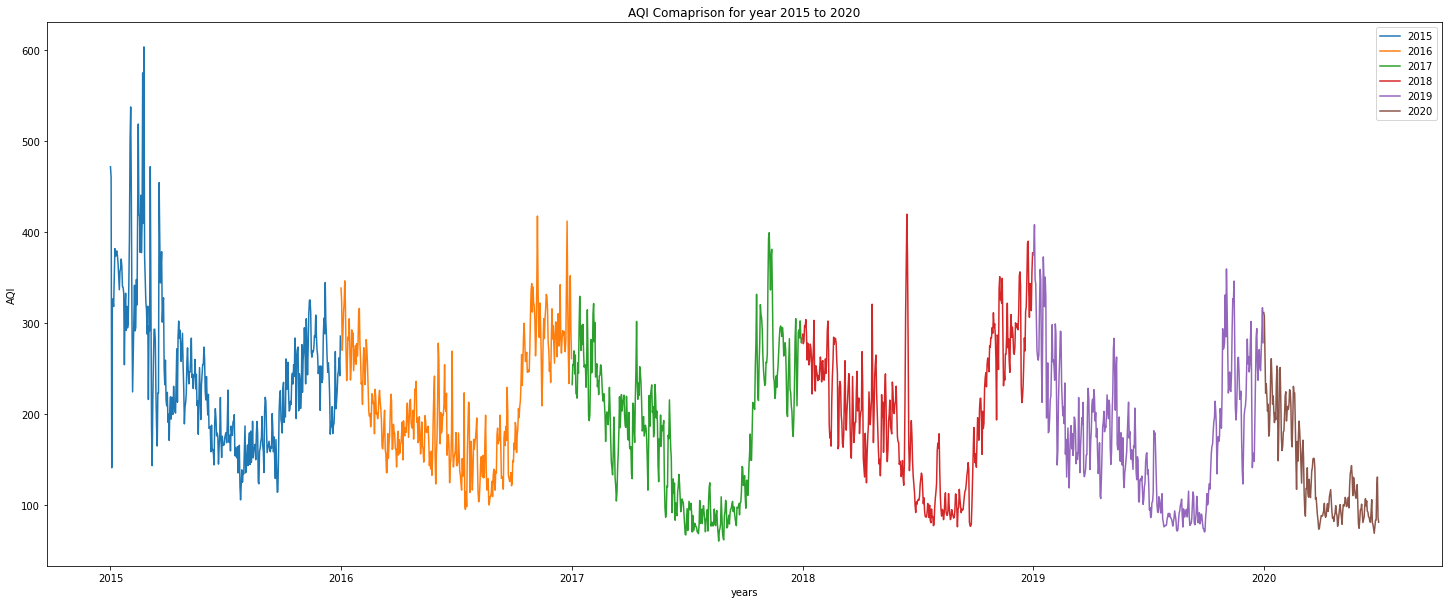

In [51]:
plt.figure(figsize=(25,10))
for compare_yr in comparison_20_19:
    sns.lineplot(x=compare_yr.Datetime.dt.date,y=compare_yr.AQI,ci=None)
    plt.title('AQI Comaprison for year 2015 to 2020')
    plt.legend(yrs)
    plt.xlabel('years')

In [52]:
all_df.Status.value_counts() # unique counts in status column

Active      2004633
Inactive      29597
Name: Status, dtype: int64

In [53]:
Inactive_station=all_df[(all_df.Status=='Inactive')].StationName.value_counts() #Select only Inactive Status with StationName

In [54]:
Inactive_station

Burari Crossing, Delhi - IMD     16522
Nishant Ganj, Lucknow - UPPCB    13075
Name: StationName, dtype: int64

### Only 2 Stations are in an inactive  state in whole dataset.

Text(0, 0.5, 'AQI Status')

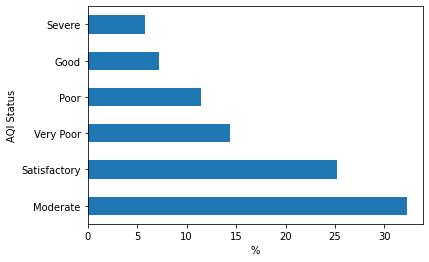

In [55]:
(all_df.AQI_Bucket.value_counts()/len(all_df)*100).plot(kind='barh')
plt.xlabel('%')
plt.ylabel('AQI Status')

This is discription of each AQI status

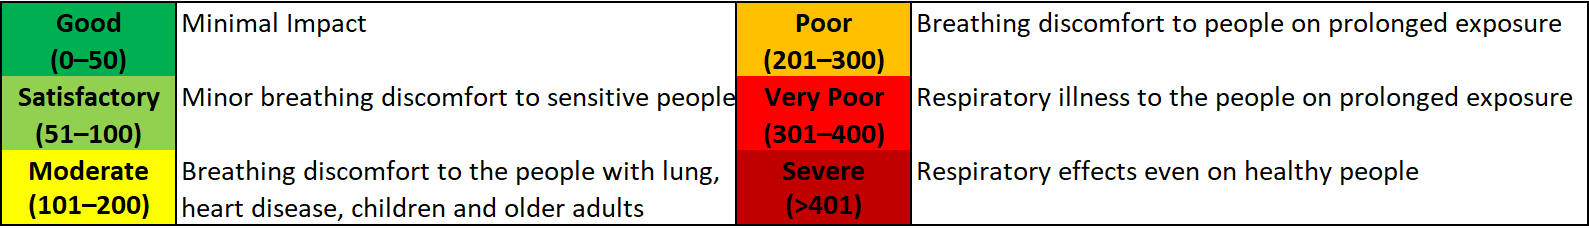

In [56]:
def AQI_mean_year():   # For AQI calculation yearwise
    AQI_mean_year_dict={}
    years=all_df.Datetime.dt.year.unique()
    for year in years:
        AQI_mean_year_dict[year]=(all_df.AQI[all_df.Datetime.dt.year==year]).mean()
    print(AQI_mean_year_dict)
    
AQI_mean_year()

{2017: 204.08522321521428, 2018: 200.6800420767844, 2019: 176.4336629631448, 2020: 136.31642708148848, 2016: 209.9784424160031, 2015: 221.1149404392737}


## 9) Comparing yearwise & monthwise AQI levels

Text(0.5, 0, 'months')

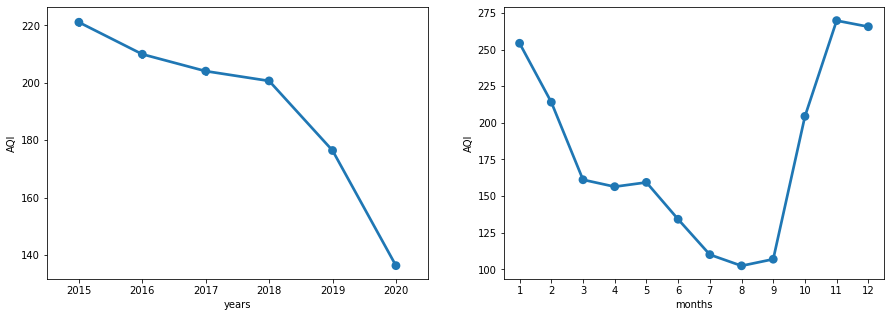

In [57]:
plt.figure(figsize=(15,5)) 

plt.subplot(1,2,1)
sns.pointplot(data=all_df, x=all_df.Datetime.dt.year, y=all_df.AQI)  # Plotting yearwise AQI
plt.xlabel('years')
plt.subplot(1,2,2)
sns.pointplot(data=all_df, x=all_df.Datetime.dt.month, y=all_df.AQI) # Plotting monthwise AQI
plt.xlabel('months')

### Month Wise data shows AQI starts increasing in the winter season & starts decreasing in summer and lowest in the rainy season

<AxesSubplot:xlabel='week', ylabel='AQI'>

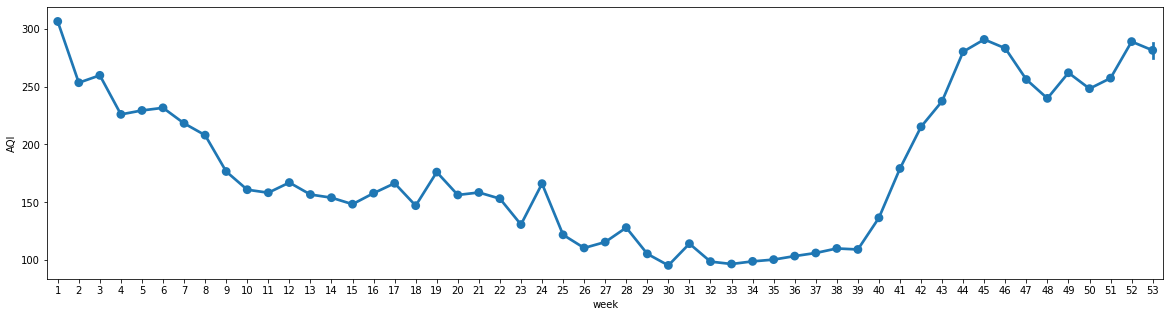

In [58]:
plt.figure(figsize=(20,5))
sns.pointplot(data=all_df, x=all_df.Datetime.dt.isocalendar().week, y=all_df.AQI) # Plotting weekwise AQI 

## 10) Distribution plot for major in pollutants 

In [59]:
pollutants=['PM2.5','PM10','NOx','NH3','CO','SO2','O3']

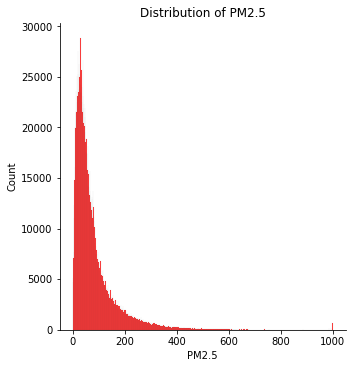

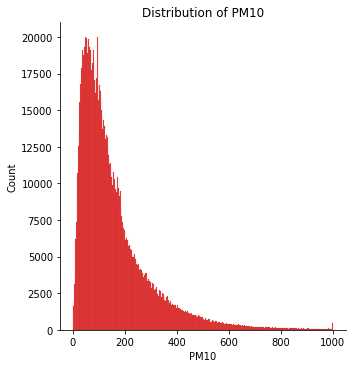

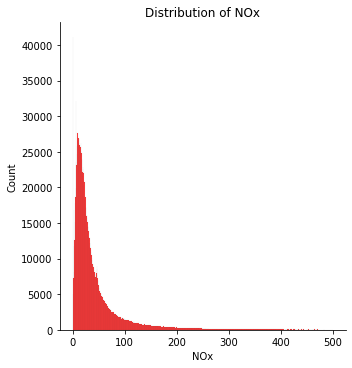

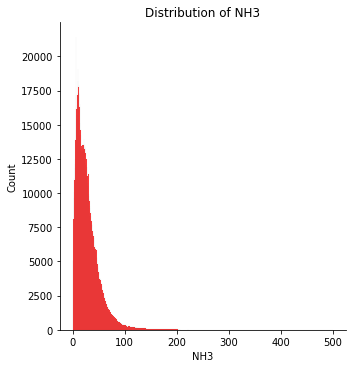

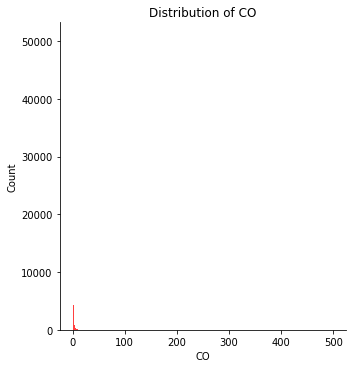

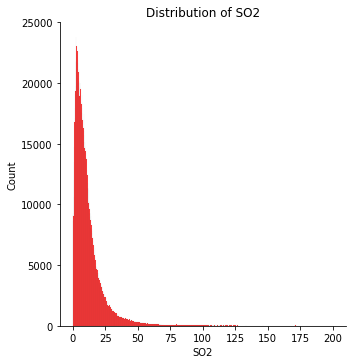

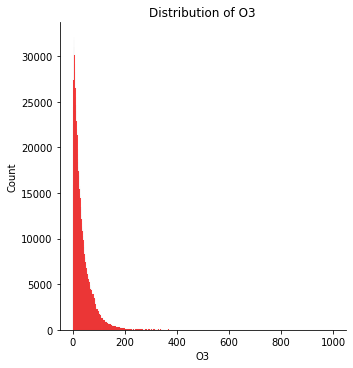

In [60]:
for pollutant in pollutants:
    sns.displot(all_df[pollutant],color='r') 
    plt.title('Distribution of '+ pollutant)

## 11) Plotting yearwise & monthwise  data for major pollutants 

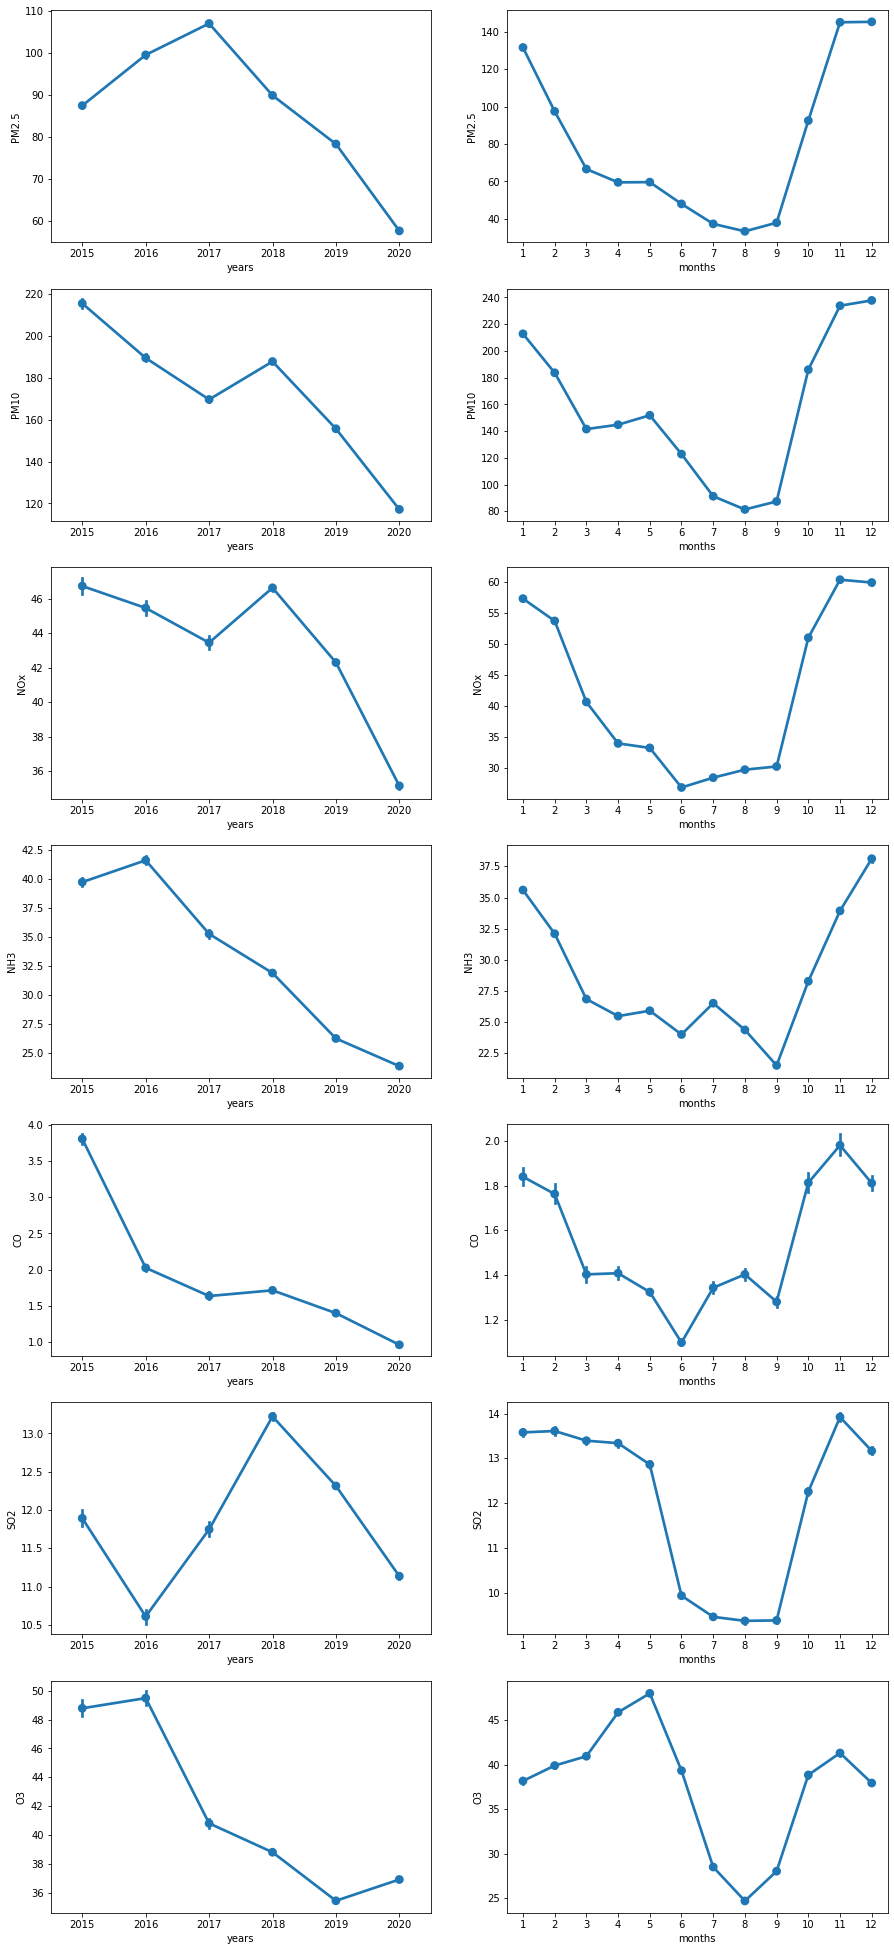

In [61]:
graph_num=1
plt.figure(figsize=(15,35))

for pollutant in pollutants:

    plt.subplot(7,2,graph_num)
    sns.pointplot(data=all_df, x=all_df.Datetime.dt.year, y=all_df[pollutant]) # Plotting yearwise data 
    plt.xlabel('years')
    plt.subplot(7,2,graph_num+1)
    sns.pointplot(data=all_df, x=all_df.Datetime.dt.month, y=all_df[pollutant]) # Plotting yearwise data 
    plt.xlabel('months')
    graph_num+=2


## 12) Let's analyze hourly data of major cities in India

In [62]:
city_data='air-quality-data-in-india/city_hour.csv'   # Reading City data from city_hour csv

In [63]:
df_city=pd.read_csv(city_data)
original_city_data=df_city.copy()
df_city.Datetime=pd.to_datetime(df_city.Datetime)
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   City        707875 non-null  object        
 1   Datetime    707875 non-null  datetime64[ns]
 2   PM2.5       562787 non-null  float64       
 3   PM10        411138 non-null  float64       
 4   NO          591243 non-null  float64       
 5   NO2         590753 non-null  float64       
 6   NOx         584651 non-null  float64       
 7   NH3         435333 non-null  float64       
 8   CO          621358 non-null  float64       
 9   SO2         577502 non-null  float64       
 10  O3          578667 non-null  float64       
 11  Benzene     544229 non-null  float64       
 12  Toluene     487268 non-null  float64       
 13  Xylene      252046 non-null  float64       
 14  AQI         578795 non-null  float64       
 15  AQI_Bucket  578795 non-null  object        
dtypes:

Text(0.5, 0, 'Number of obeservations')

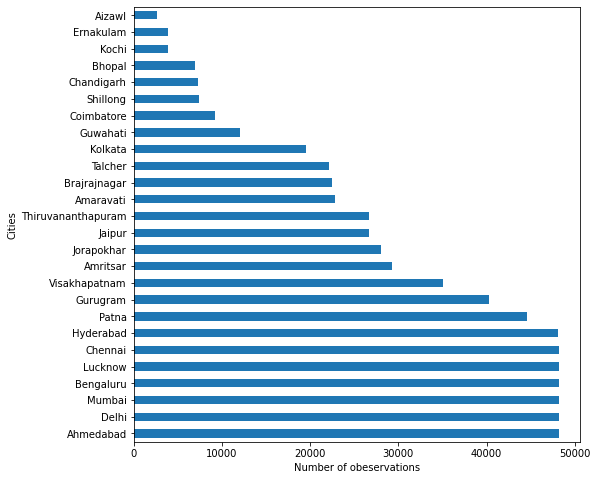

In [64]:
plt.figure(figsize=(8,8))
df_city.City.value_counts().plot(kind='barh') # Horizontal bar graph for City data 
plt.ylabel('Cities')
plt.xlabel('Number of obeservations')

            Missing values  % of missing values
City                     0             0.000000
Datetime                 0             0.000000
CO                   86517            12.222073
NO                  116632            16.476355
NO2                 117122            16.545577
NOx                 123224            17.407593
AQI                 129080            18.234858
AQI_Bucket          129080            18.234858
O3                  129208            18.252940
SO2                 130373            18.417517
PM2.5               145088            20.496274
Benzene             163646            23.117923
Toluene             220607            31.164683
NH3                 272542            38.501430
PM10                296737            41.919407
Xylene              455829            64.393996


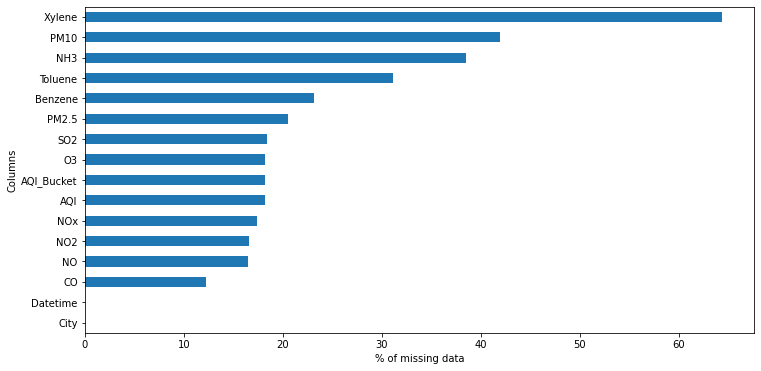

In [65]:
def missing_city_data():
    missing_values=df_city.isnull().sum().sort_values()
    missing_values_percent=(df_city.isnull().sum()/len(df_city)*100).sort_values()
    mis_val_table=pd.concat([missing_values, missing_values_percent],keys=['Missing values','% of missing values'], axis=1)
    print(mis_val_table)
    plt.figure(figsize=(12,6))
    missing_values_percent.plot(kind='barh')
    plt.xlabel('% of missing data')
    plt.ylabel('Columns')

missing_city_data()

In [66]:
null_city_data=df_city[df_city['PM2.5'].isnull() & df_city['PM10'].isnull() & df_city['NOx'].isnull() & df_city['NH3'].isnull() 
                  & df_city['CO'].isnull() & df_city['SO2'].isnull()  & df_city['O3'].isnull() ]

In [67]:
null_city_data.shape

(61123, 16)

In [68]:
len(null_city_data)/len(df_city)*100 

8.634716581317322

### 8.6% data missing for major pollutants in city_hour.csv 

## 13) Deleting those rows which having no sensor data.

In [69]:
delete_city_data=df_city['PM2.5'].isnull() & df_city['PM10'].isnull() & df_city['NOx'].isnull() & df_city['NH3'].isnull() & df_city['CO'].isnull() & df_city['SO2'].isnull() & df_city['O3'].isnull() 

In [70]:
df_city=df_city.drop(index=df_city[delete_data].index)

C:\Users\vinay\AppData\Local\Temp/ipykernel_9916/1038109659.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_city=df_city.drop(index=df_city[delete_data].index)


In [71]:
df_city.reset_index(inplace=True)   

In [72]:
df_city.drop(columns='index', inplace=True)

In [73]:
cities=df_city.City.unique() # Getting unique cities from 'City' column 
cities

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Hyderabad', 'Jaipur',
       'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna',
       'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam'],
      dtype=object)

## 14) Creating dictionary for each city to access the city data 

In [74]:
cities_all_data=[]  # creating an empty list for sorting each city data differently

In [75]:
for city in cities:
    cities_all_data.append(df_city[df_city.City==city])

In [76]:
cities_all_data_dict=dict(zip(cities,cities_all_data)) #  Dictionary of city name and respective city data

In [77]:
cities_all_data_dict['Mumbai'] # Accessing City data

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
431810,Mumbai,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,24.38,NaN,0.00,NaN,NaN,0.00,0.0,0.0,NaN,NaN
431811,Mumbai,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,24.60,NaN,0.00,NaN,NaN,0.00,0.0,0.0,NaN,NaN
431812,Mumbai,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,24.75,NaN,0.00,NaN,NaN,0.00,0.0,0.0,NaN,NaN
431813,Mumbai,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,24.17,NaN,0.00,NaN,NaN,0.00,0.0,0.0,NaN,NaN
431814,Mumbai,2015-01-01 05:00:00,NaN,NaN,NaN,NaN,23.87,NaN,0.00,NaN,NaN,0.00,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469581,Mumbai,2020-06-30 20:00:00,7.70,10.90,20.14,7.46,27.59,15.20,0.36,13.71,8.22,0.44,NaN,NaN,54.0,Satisfactory
469582,Mumbai,2020-06-30 21:00:00,5.99,10.16,21.40,7.71,29.12,15.95,0.38,13.71,6.60,0.10,NaN,NaN,53.0,Satisfactory
469583,Mumbai,2020-06-30 22:00:00,6.53,18.54,23.56,7.75,31.31,17.05,0.41,13.48,6.06,0.36,NaN,NaN,54.0,Satisfactory
469584,Mumbai,2020-06-30 23:00:00,4.88,13.43,25.81,6.49,32.30,20.02,0.38,11.15,6.05,0.72,NaN,NaN,53.0,Satisfactory


## 15) Let's analyze top 10 cities for each pollutant

In [78]:
city_pollutant=[] # Creating lists to store each pollutant's data 
city_PM10=[]
city_PM25=[]
city_NOx=[]
city_NH3=[] 
city_CO=[] 
city_SO2=[] 
city_O3=[]

In [79]:
for city_name, data in cities_all_data_dict.items():  # Calculating mean of each pollutant
    city_PM10.append(data.PM10.mean())
    city_PM25.append(data['PM2.5'].mean()) 
    city_NOx.append(data.NOx.mean())
    city_NH3.append(data.NH3.mean())
    city_CO.append(data.CO.mean())
    city_SO2.append(data.SO2.mean())
    city_O3.append(data.O3.mean())    

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bhopal'),
  Text(1, 0, 'Delhi'),
  Text(2, 0, 'Jaipur'),
  Text(3, 0, 'Ahmedabad'),
  Text(4, 0, 'Patna'),
  Text(5, 0, 'Visakhapatnam'),
  Text(6, 0, 'Amaravati'),
  Text(7, 0, 'Lucknow'),
  Text(8, 0, 'Thiruvananthapuram'),
  Text(9, 0, 'Gurugram')])

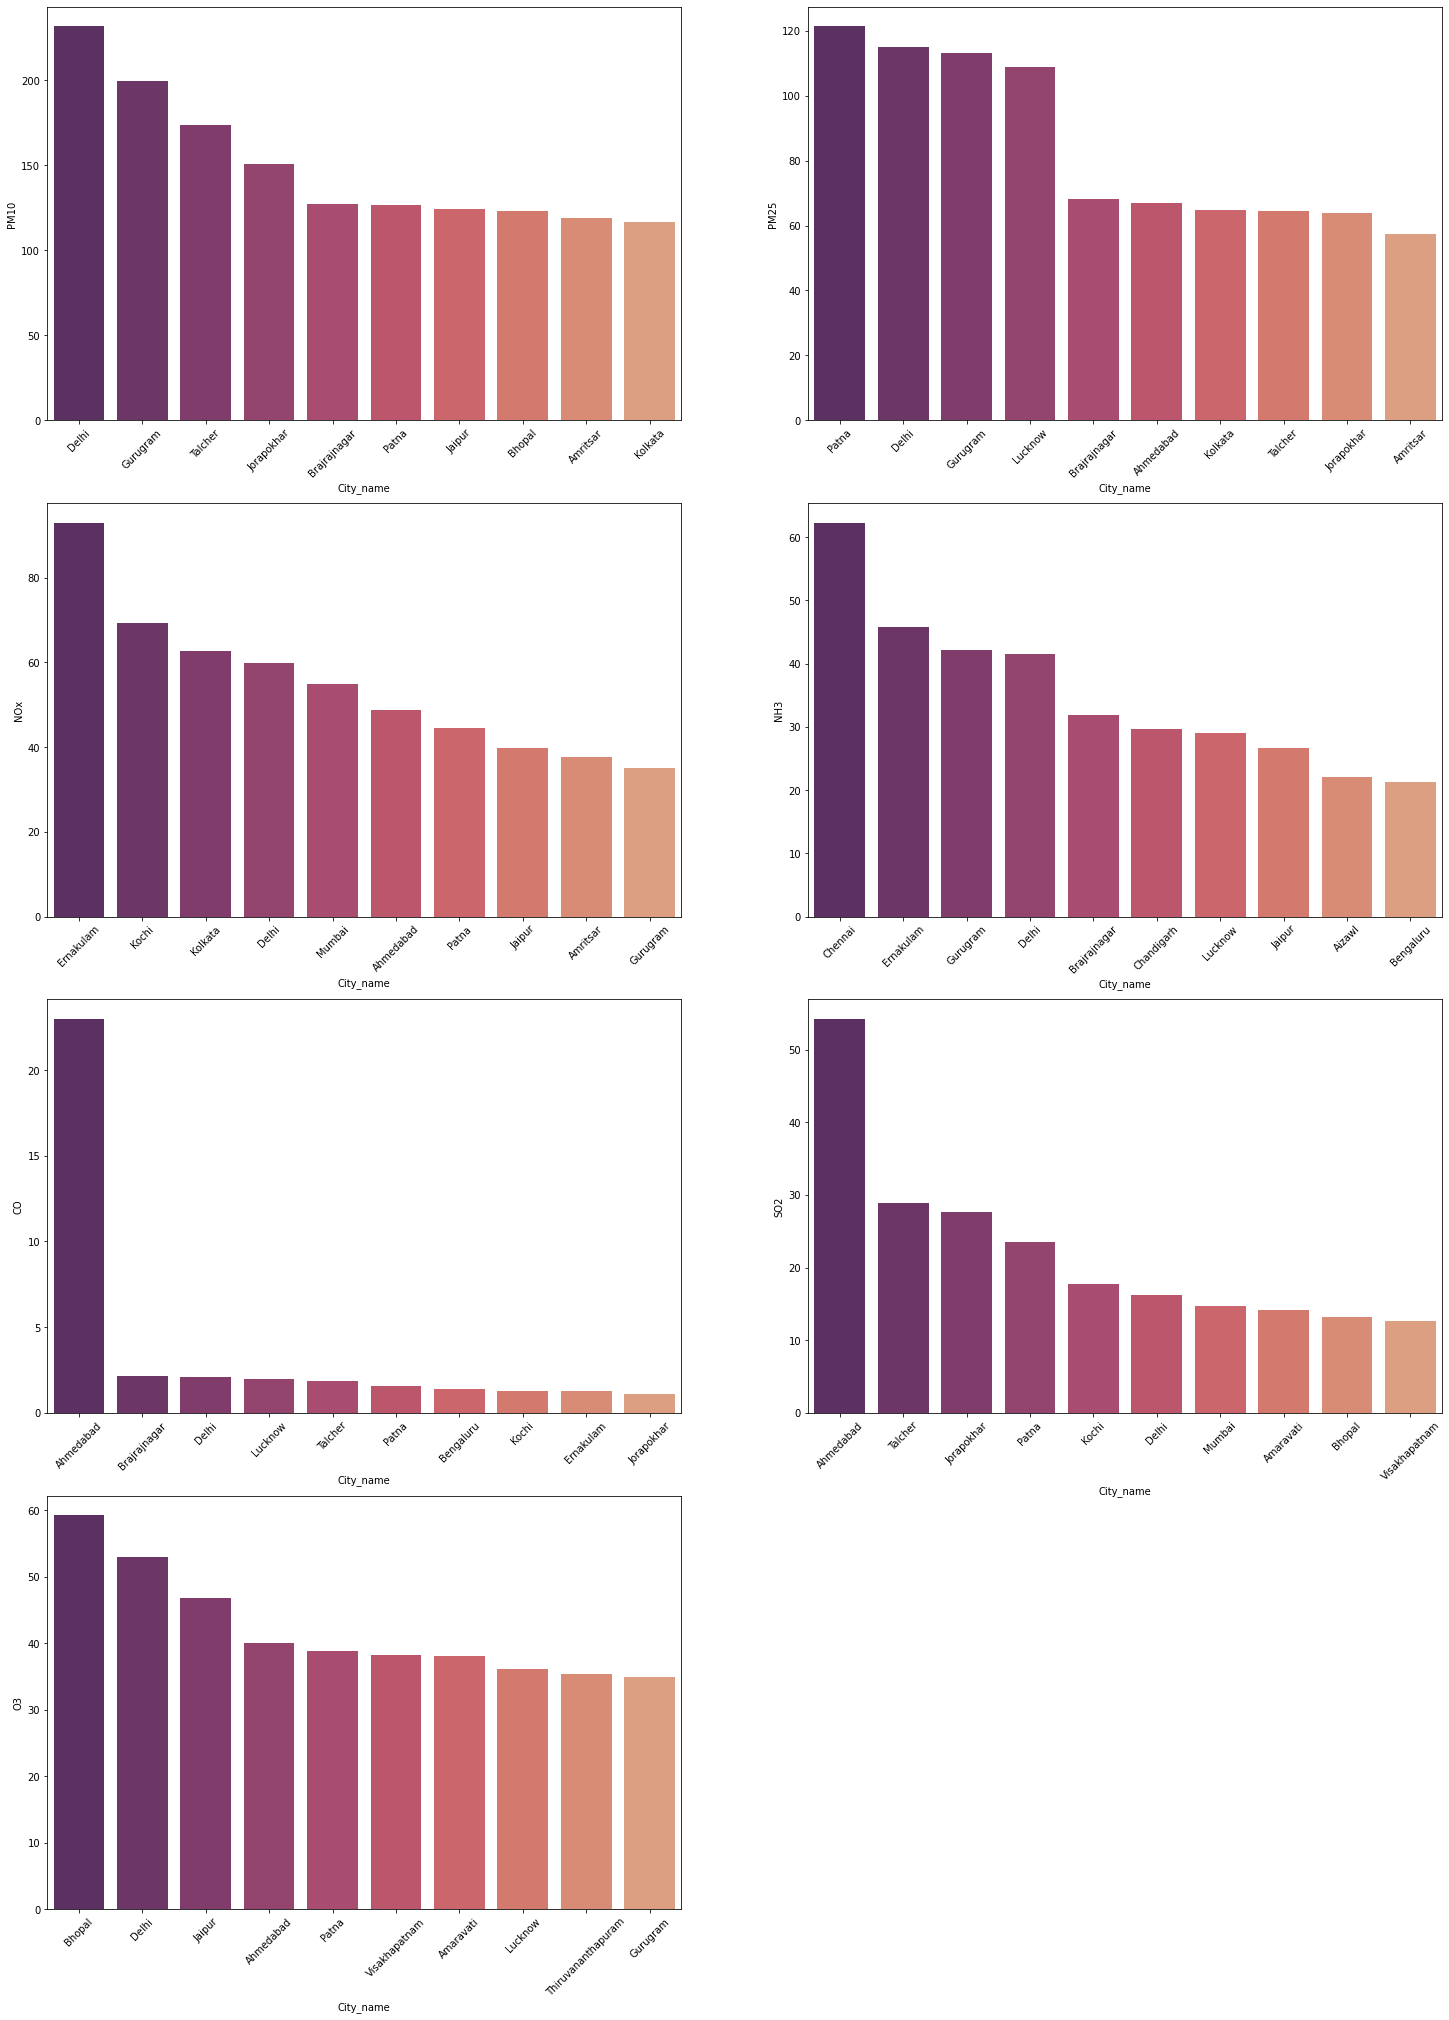

In [80]:
plt.figure(figsize=(25,35))
plt.tight_layout()

plt.subplot(4,2,1)
sns.barplot(x=pd.DataFrame(dict(City_name=cities,PM10=city_PM10)).nlargest(10,'PM10').reset_index().City_name,
            y=pd.DataFrame(dict(City_name=cities,PM10=city_PM10)).nlargest(10,'PM10').reset_index().PM10,palette='flare_r') 
plt.xticks(rotation=45)

plt.subplot(4,2,2)
sns.barplot(x=pd.DataFrame(dict(City_name=cities,PM25=city_PM25)).nlargest(10,'PM25').reset_index().City_name,
            y=pd.DataFrame(dict(City_name=cities,PM25=city_PM25)).nlargest(10,'PM25').reset_index().PM25,palette='flare_r') 
plt.xticks(rotation=45)

plt.subplot(4,2,3)
sns.barplot(x=pd.DataFrame(dict(City_name=cities,NOx=city_NOx)).nlargest(10,'NOx').reset_index().City_name,
            y=pd.DataFrame(dict(City_name=cities,NOx=city_NOx)).nlargest(10,'NOx').reset_index().NOx,palette='flare_r') 
plt.xticks(rotation=45)

plt.subplot(4,2,4)
sns.barplot(x=pd.DataFrame(dict(City_name=cities,NH3=city_NH3)).nlargest(10,'NH3').reset_index().City_name,
            y=pd.DataFrame(dict(City_name=cities,NH3=city_NH3)).nlargest(10,'NH3').reset_index().NH3,palette='flare_r') 
plt.xticks(rotation=45)

plt.subplot(4,2,5)
sns.barplot(x=pd.DataFrame(dict(City_name=cities,CO=city_CO)).nlargest(10,'CO').reset_index().City_name,
            y=pd.DataFrame(dict(City_name=cities,CO=city_CO)).nlargest(10,'CO').reset_index().CO,palette='flare_r') 
plt.xticks(rotation=45)

plt.subplot(4,2,6)
sns.barplot(x=pd.DataFrame(dict(City_name=cities,SO2=city_SO2)).nlargest(10,'SO2').reset_index().City_name,
            y=pd.DataFrame(dict(City_name=cities,SO2=city_SO2)).nlargest(10,'SO2').reset_index().SO2,palette='flare_r') 
plt.xticks(rotation=45)

plt.subplot(4,2,7)
sns.barplot(x=pd.DataFrame(dict(City_name=cities,O3=city_O3)).nlargest(10,'O3').reset_index().City_name,
            y=pd.DataFrame(dict(City_name=cities,O3=city_O3)).nlargest(10,'O3').reset_index().O3,palette='flare_r') 
plt.xticks(rotation=45)

### 'Delhi' is present in almost every pollutant's top 5 cities.
### 'Ahmedabad' having highest CO emmision.

## 16) Let's Analyze daywise data for major cities in India.

In [81]:
city_daily_data='air-quality-data-in-india/city_day.csv'

In [82]:
df_city_daily_data=pd.read_csv(city_daily_data)
df_city_daily_data.Date=pd.to_datetime(df_city_daily_data.Date)

In [83]:
df_city_daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [84]:
cities_daily_all_data=[]

In [85]:
for city in cities:
    cities_daily_all_data.append(df_city_daily_data[df_city_daily_data.City==city])

In [86]:
cities_daily_all_data_dict=dict(zip(cities,cities_daily_all_data)) #  Dictionary of city name and respective city daily data

## 17) Plotting yearwise AQI for all cities

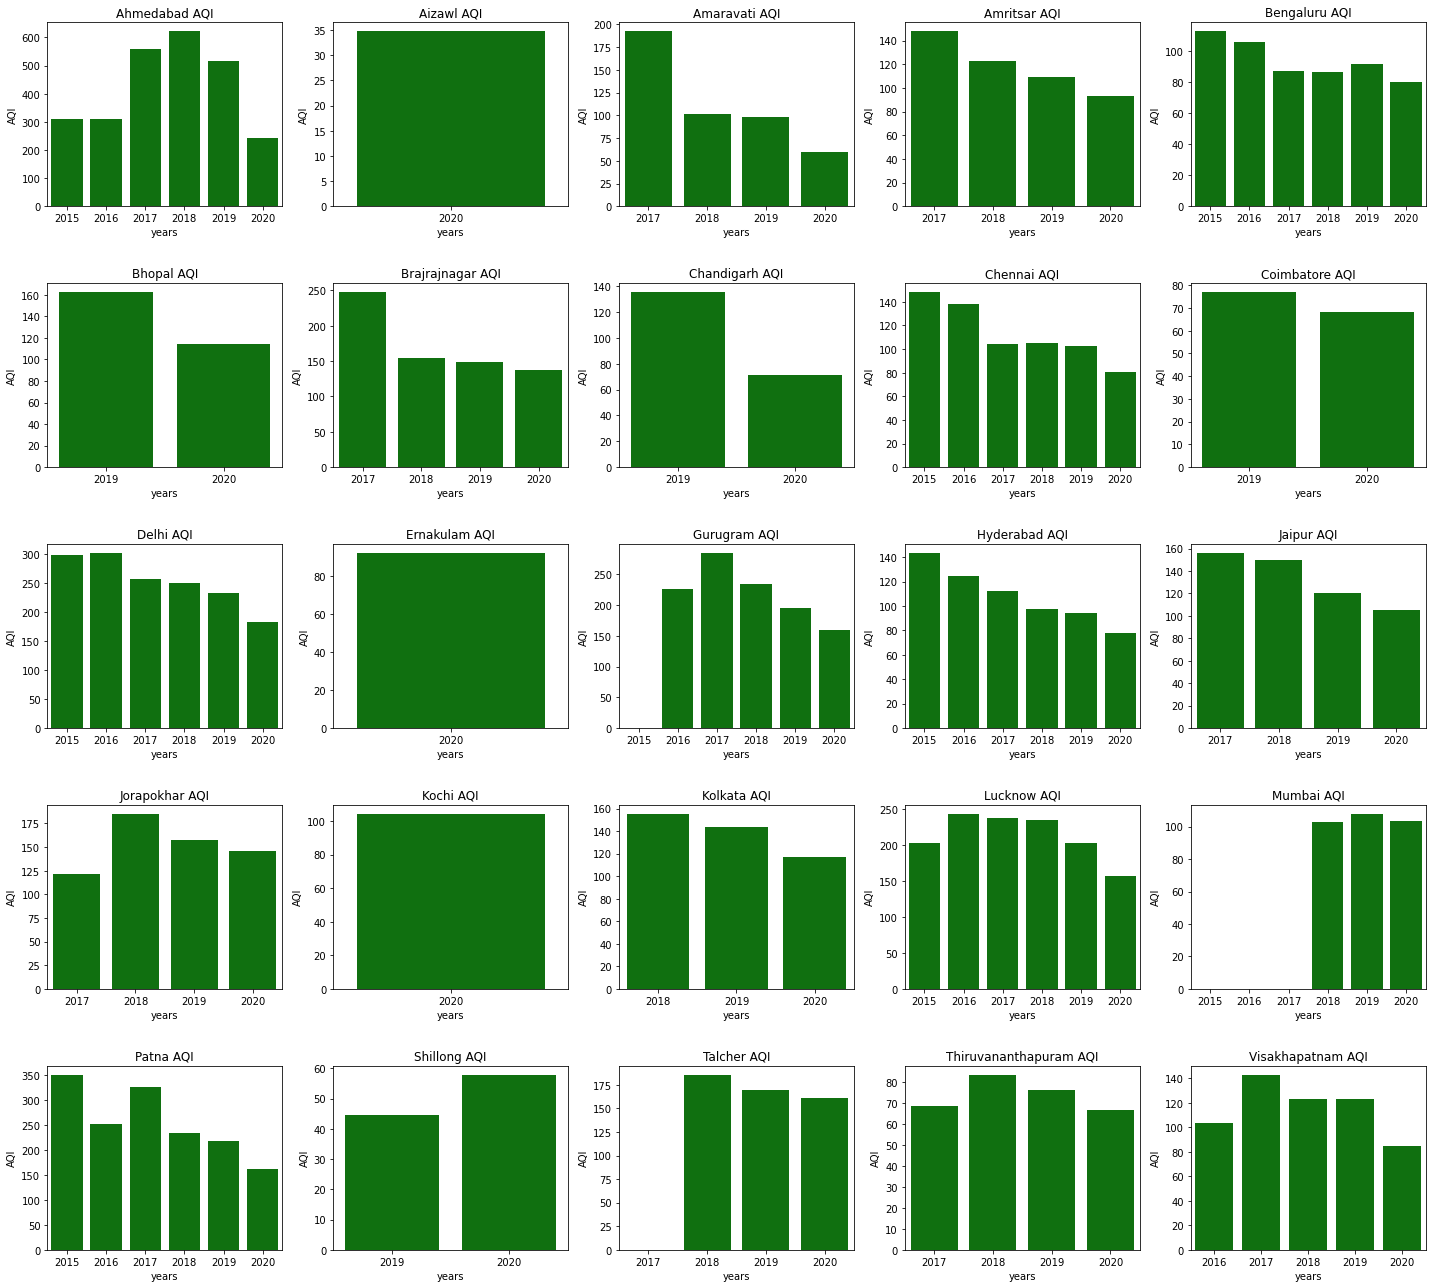

In [87]:
plt.figure(figsize=(20,18))
graph_num=1
for city in cities:
    plt.subplot(5,5,graph_num)
    sns.barplot(x=cities_daily_all_data_dict[city].Date.dt.year,y=cities_daily_all_data_dict[city].AQI,ci=None,color='g')
    plt.title(city+' AQI')
    plt.xlabel('years')
    plt.tight_layout(h_pad=3)
    graph_num+=1

### Not all cities having data for all years (from 2015 to 2020) or AQI data is missing (year with no bar in graph) 

## 18) Plotting monthwise AQI for all cities

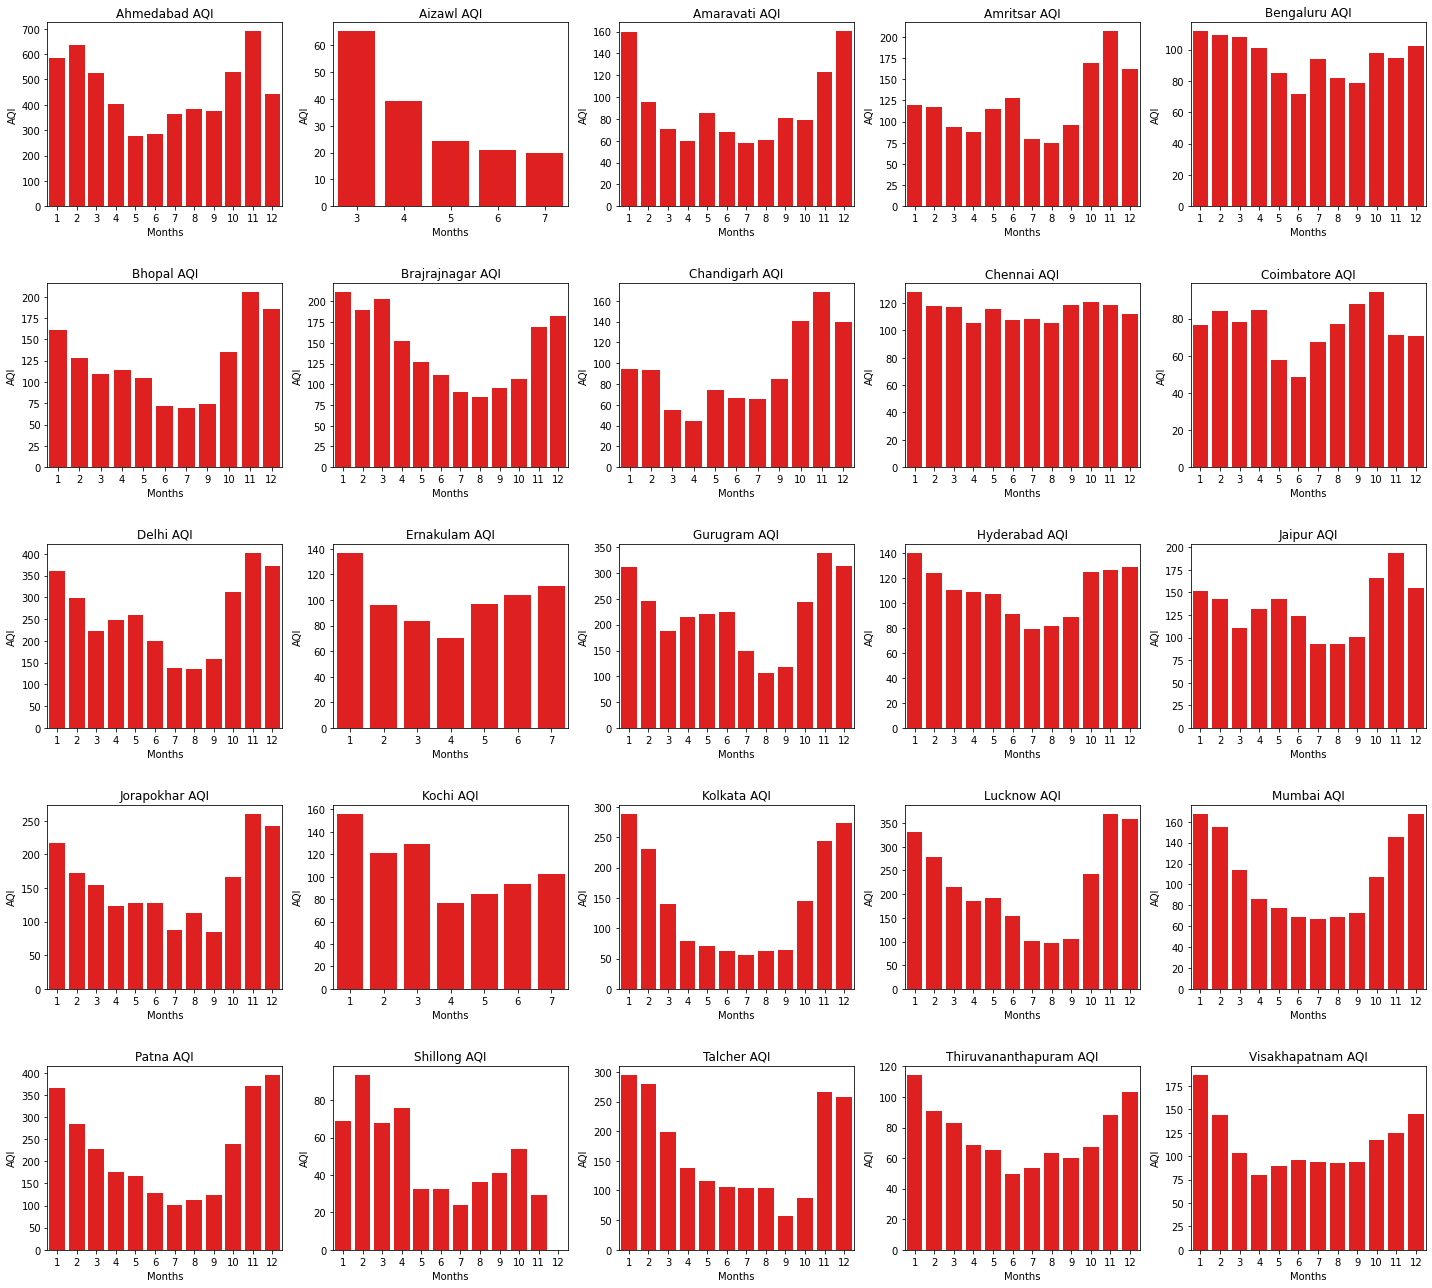

In [88]:
plt.figure(figsize=(20,18))
graph=1
for city in cities:
    plt.subplot(5,5,graph)
    sns.barplot(x=cities_daily_all_data_dict[city].Date.dt.month,y=cities_daily_all_data_dict[city].AQI,ci=None,color='r')
    plt.title(city+' AQI')
    plt.xlabel('Months')
    plt.tight_layout(h_pad=3)
    graph+=1

## 19) Let's anlyze daywise data for major cities

In [89]:
sample_cities=['Delhi', 'Mumbai','Chennai','Kolkata','Ahmedabad','Bengaluru']

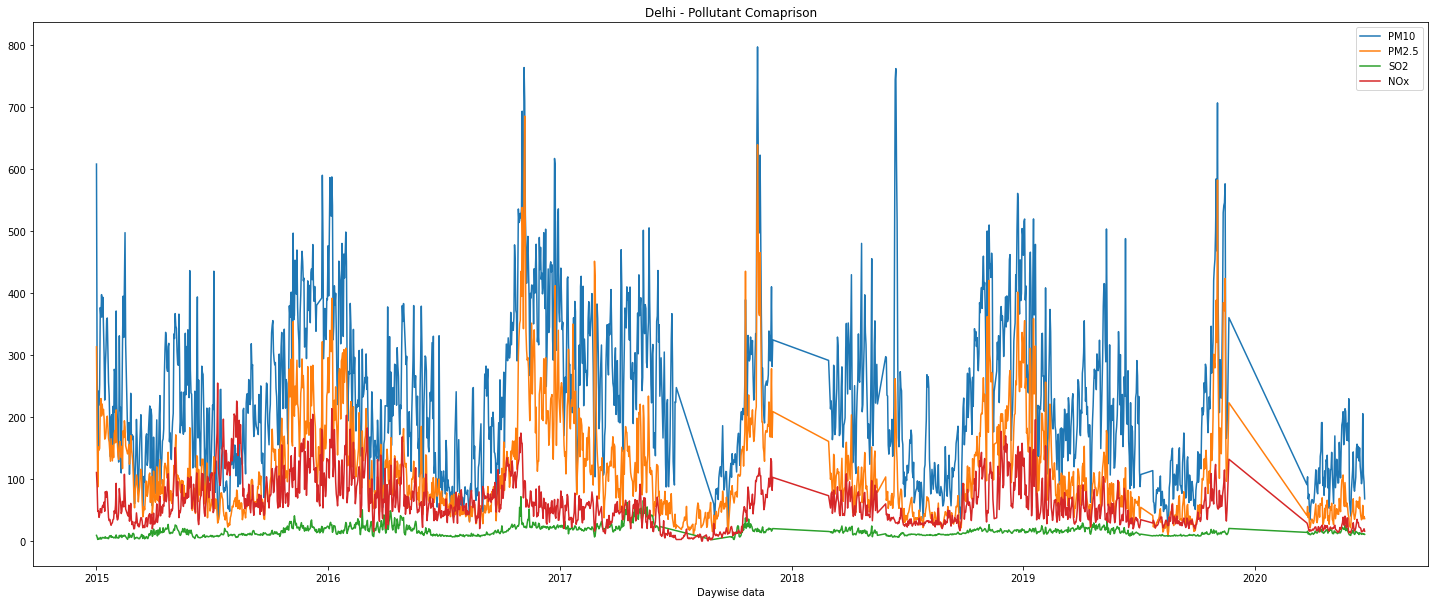

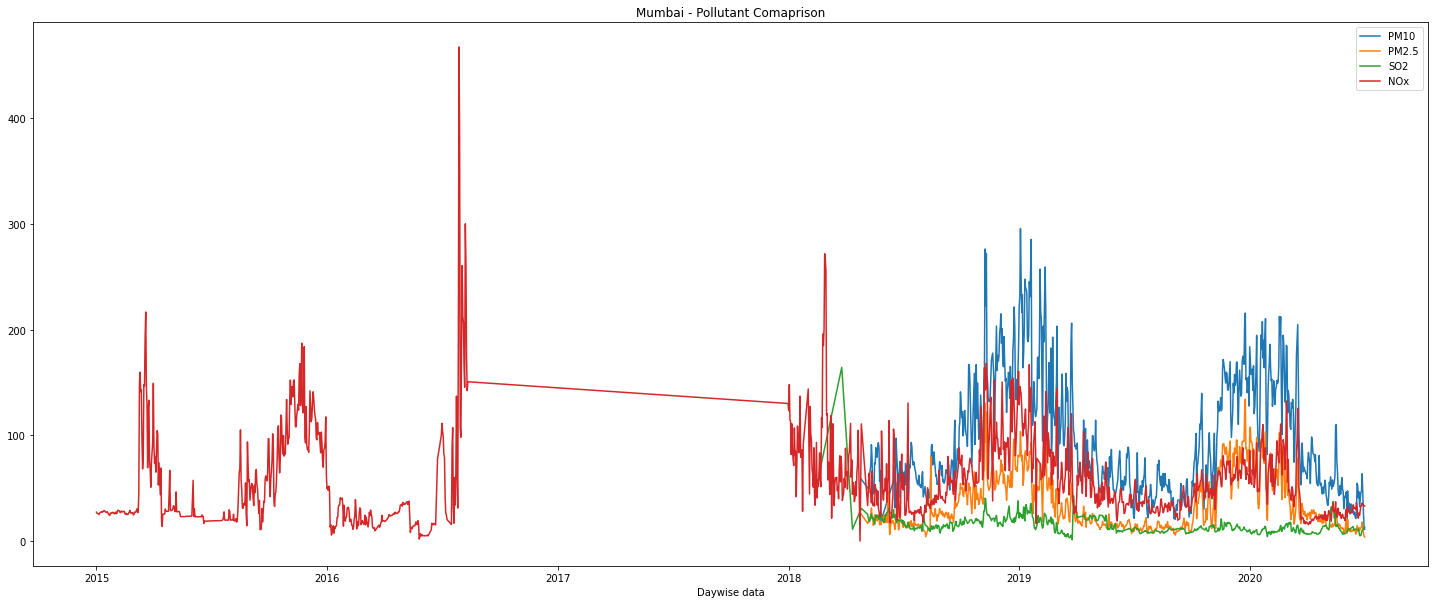

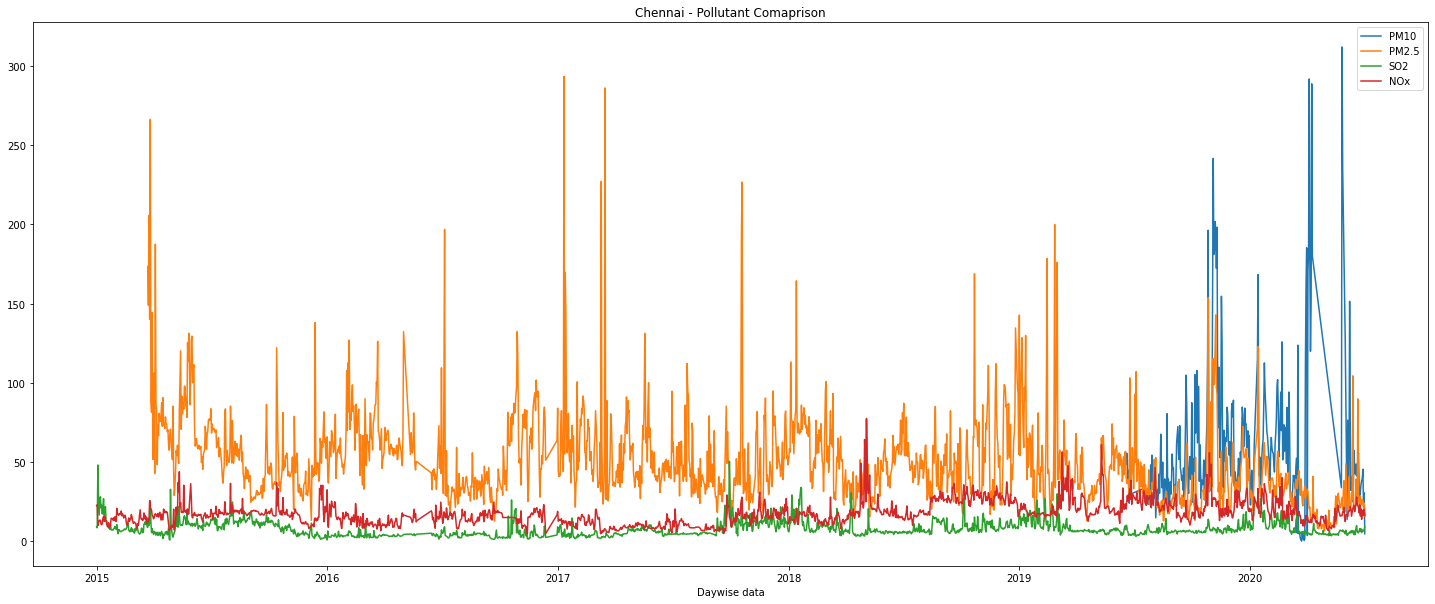

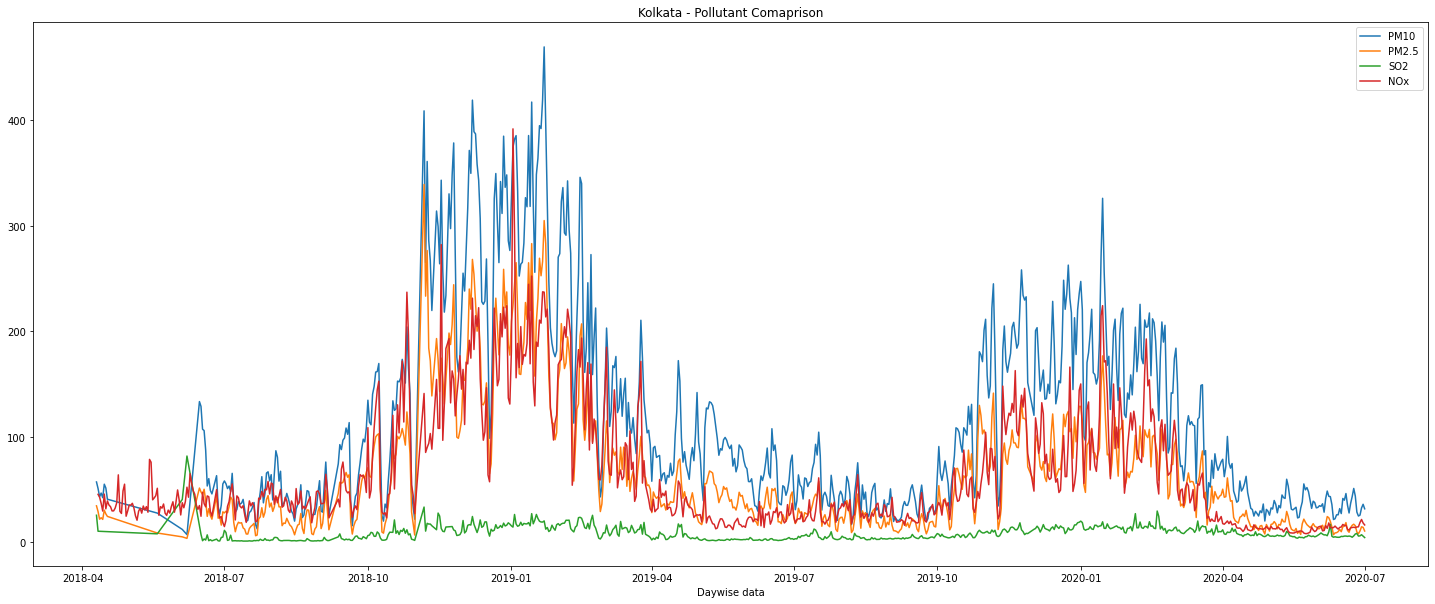

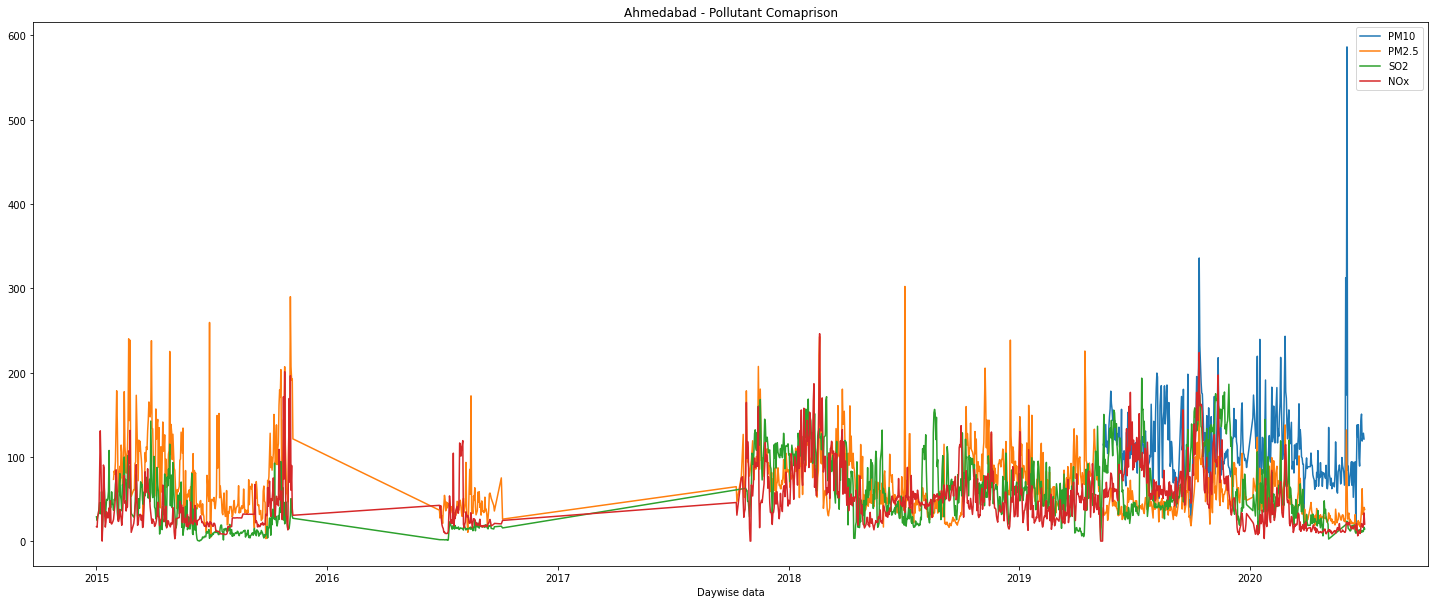

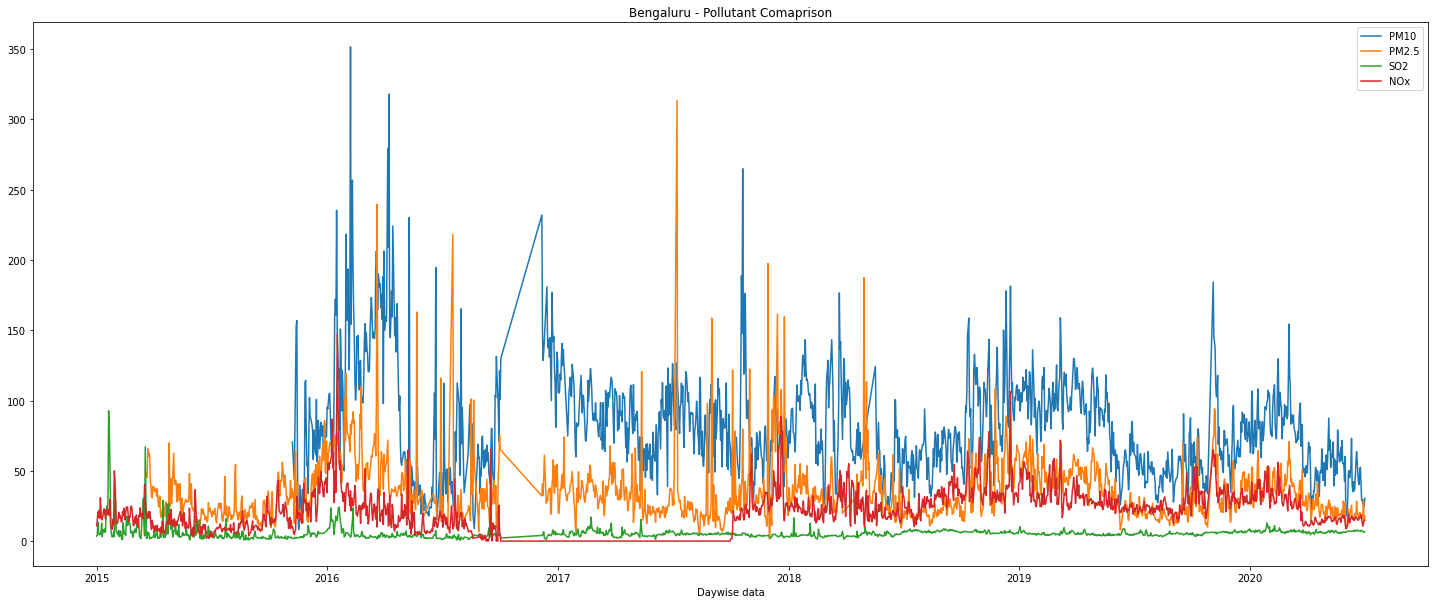

In [90]:
 
for sample_city in sample_cities:
    plt.figure(figsize=(25,10))
    sns.lineplot(x=cities_all_data_dict[sample_city].Datetime.dt.date,y=cities_all_data_dict[sample_city].PM10,ci=None)
    sns.lineplot(x=cities_all_data_dict[sample_city].Datetime.dt.date,y=cities_all_data_dict[sample_city]['PM2.5'],ci=None)
    sns.lineplot(x=cities_all_data_dict[sample_city].Datetime.dt.date,y=cities_all_data_dict[sample_city].SO2,ci=None)
    sns.lineplot(x=cities_all_data_dict[sample_city].Datetime.dt.date,y=cities_all_data_dict[sample_city].NOx,ci=None)

    plt.title(sample_city+' - Pollutant Comaprison')
    plt.legend(['PM10','PM2.5','SO2','NOx'])
    plt.xlabel('Daywise data')
    plt.ylabel('')

## 20) AQI comparison for major cities

In [91]:
sample_cities_AQI=['Delhi', 'Mumbai','Chennai','Kolkata','Ahmedabad','Bengaluru']

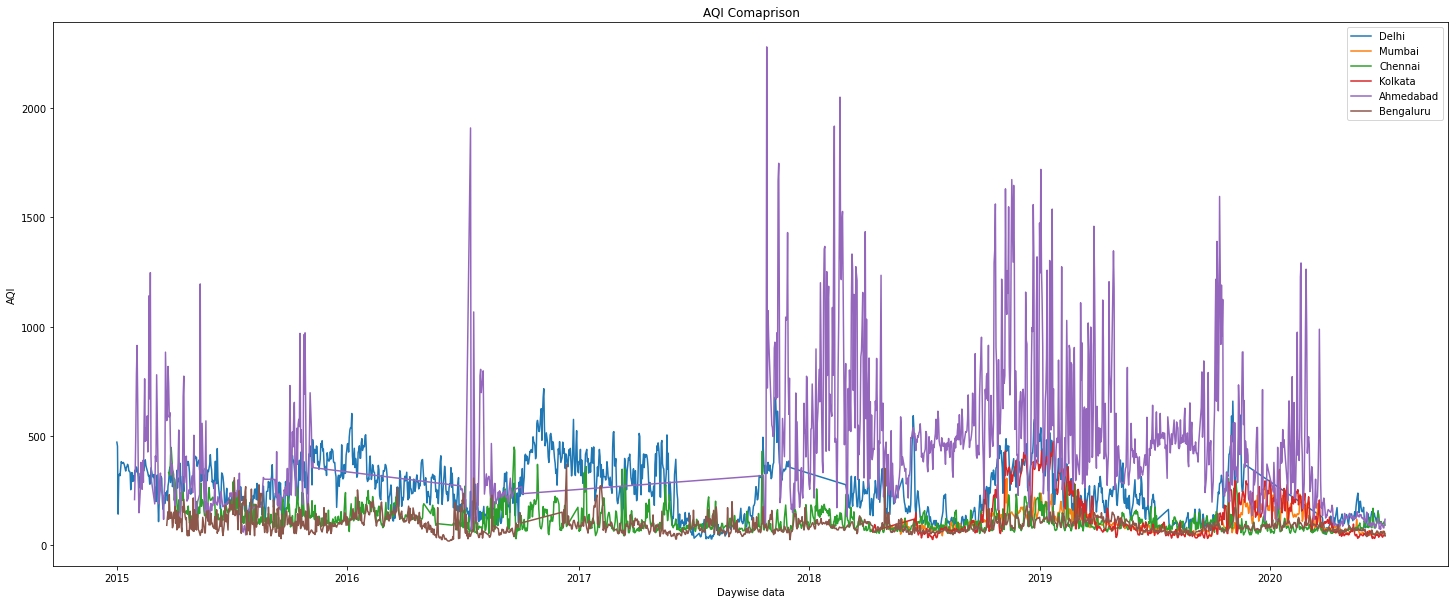

In [92]:
plt.figure(figsize=(25,10))
for sample_city_ in sample_cities:
    sns.lineplot(x=cities_all_data_dict[sample_city_].Datetime.dt.date,y=cities_all_data_dict[sample_city_].AQI,ci=None)
    plt.title('AQI Comaprison')
    plt.legend(sample_cities_AQI)
    plt.xlabel('Daywise data')
    

### Horizontal straight line/steep lines indicates the no data for that time period

## 21) Comparison of AQI for year 2019 & 2020 

In [93]:
comparison_20_19=[df_2019,df_2020]
yrs=[2019,2020]

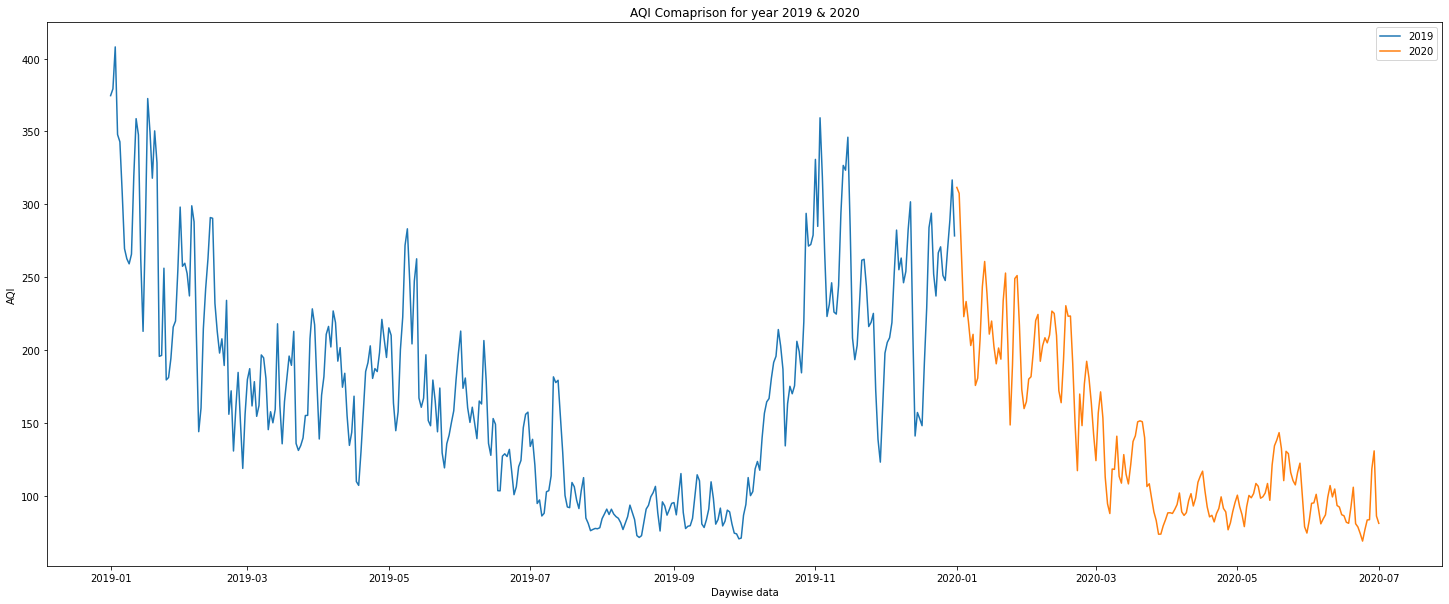

In [94]:
plt.figure(figsize=(25,10))
for compare_yr in comparison_20_19:
    sns.lineplot(x=compare_yr.Datetime.dt.date,y=compare_yr.AQI,ci=None)
    plt.title('AQI Comaprison for year 2019 & 2020')
    plt.legend(yrs)
    plt.xlabel('Daywise data')

### After comparing 2019 & 2020 monthwise data (March-July), there is drop in AQI levels  because of lockdown which was imposed in March 2020.